In [60]:
import pandas as pd
df = pd.read_csv("Pittsburgh_ProcessedDataSet.csv")
PA_restaurants_Cat = df

In [61]:
import pandas as pd
df = pd.read_json('business.json', lines=True)
df.categories = df.categories.fillna('No category')
df = df.loc[df['categories'].str.contains('Restaurants')]
df = df[df['state'].str.contains('PA')]
df = df[df['city'].str.contains('Pittsburgh')]

Business_Table_2 = df[['business_id', 'attributes']]
Business_Table_2['attributes'].apply(pd.Series)
Business_Table_2 = pd.concat([Business_Table_2.drop(['attributes'], axis=1), Business_Table_2['attributes'].apply(pd.Series)], axis=1)

In [62]:
PA_Business_Table = Business_Table_2.drop(['NoiseLevel', 'GoodForMeal', 'Caters', 'RestaurantsTakeOut', 'Ambience', 'BusinessParking','RestaurantsTableService', 'BikeParking', 'RestaurantsAttire', 'BusinessAcceptsBitcoin','DogsAllowed', 'WheelchairAccessible', 'HappyHour', 'Corkage','BYOBCorkage', 'BYOB', 'GoodForDancing', 'Music', 'CoatCheck','BestNights', 'Smoking', 'DriveThru', 'ByAppointmentOnly','Open24Hours', 'AgesAllowed'], axis=1)

In [63]:
PA_merged_attribs_Cats =  PA_Business_Table.merge(PA_restaurants_Cat, on='business_id')

In [64]:
PA_merged_attribs_Cats = PA_merged_attribs_Cats.drop(['name', 'address', 'city', 'state', 'postal_code', 'categories'], axis=1)
#PA_merged_attribs_Cats.isnull().sum()

In [65]:
#Change all null to False except price
PA_merged_attribs_Cats.OutdoorSeating = PA_merged_attribs_Cats.OutdoorSeating.fillna('False')
PA_merged_attribs_Cats.BusinessAcceptsCreditCards = PA_merged_attribs_Cats.BusinessAcceptsCreditCards.fillna('False')
PA_merged_attribs_Cats.RestaurantsDelivery = PA_merged_attribs_Cats.RestaurantsDelivery.fillna('False')
PA_merged_attribs_Cats.RestaurantsReservations = PA_merged_attribs_Cats.RestaurantsReservations.fillna('False')
PA_merged_attribs_Cats.RestaurantsGoodForGroups = PA_merged_attribs_Cats.RestaurantsGoodForGroups.fillna('False')
PA_merged_attribs_Cats.RestaurantsPriceRange2 = PA_merged_attribs_Cats.RestaurantsPriceRange2.fillna('False')
PA_merged_attribs_Cats.GoodForKids = PA_merged_attribs_Cats.GoodForKids.fillna('False')
PA_merged_attribs_Cats.HasTV = PA_merged_attribs_Cats.HasTV.fillna('False')
PA_merged_attribs_Cats.WiFi = PA_merged_attribs_Cats.WiFi.fillna('False')
PA_merged_attribs_Cats.Alcohol = PA_merged_attribs_Cats.Alcohol.fillna('False')
PA_merged_attribs_Cats

,business_id,RestaurantsDelivery,RestaurantsReservations,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForKids,HasTV,OutdoorSeating,WiFi,Alcohol,stars,review_count,is_open,TypeCusine
0,1RHY4K3BD22FK7Cfftn8Mg,False,False,True,1,True,True,False,False,False,False,4.0,35,1,American
1,dQj5DLZjeDK3KFysh1SYOQ,False,False,True,2,True,False,False,False,u'free',u'full_bar',4.5,242,1,European
2,v-scZMU6jhnmV955RSzGJw,False,False,True,2,False,True,True,False,'no','none',4.5,106,1,Japanese
3,t-6tdxRaz7s9a0sf94Tguw,False,False,False,2,True,True,False,False,u'no',u'none',4.5,29,0,Caribbean
4,5WMIvoMx3l1vn1uJ3HZB6Q,False,False,True,1,False,True,False,False,False,u'none',3.0,3,1,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,mmvVocwFHyzNbCtYd1EH4w,False,True,True,2,True,True,False,True,False,u'none',3.5,37,0,American
2417,4revUiH2pE65iffL13LNMQ,False,False,True,2,True,False,True,True,False,u'full_bar',3.0,6,0,American
2418,8c2ObImjXJ9pW0hUccL35A,False,False,True,1,False,True,False,False,False,False,3.5,5,1,American
2419,CzqGem5OaPAk10bQK4bzbg,False,True,True,2,True,True,True,False,u'no',u'full_bar',4.0,64,1,American


In [66]:
#Change WiFi to True and False
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "'no'", value = "False")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "u'no'", value = "False")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "u'free'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "'free'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "'paid'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "u'paid'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "None", value = "False")

In [67]:
#Change Alcohol to True and False
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "u'full_bar'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "u'beer_and_wine'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "'full_bar'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "'beer_and_wine'", value = "True")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "u'none'", value = "False")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "'none'", value = "False")
PA_merged_attribs_Cats = PA_merged_attribs_Cats.replace(to_replace = "None", value = "False")
PA_merged_attribs_Cats

,business_id,RestaurantsDelivery,RestaurantsReservations,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForKids,HasTV,OutdoorSeating,WiFi,Alcohol,stars,review_count,is_open,TypeCusine
0,1RHY4K3BD22FK7Cfftn8Mg,False,False,True,1,True,True,False,False,False,False,4.0,35,1,American
1,dQj5DLZjeDK3KFysh1SYOQ,False,False,True,2,True,False,False,False,True,True,4.5,242,1,European
2,v-scZMU6jhnmV955RSzGJw,False,False,True,2,False,True,True,False,False,False,4.5,106,1,Japanese
3,t-6tdxRaz7s9a0sf94Tguw,False,False,False,2,True,True,False,False,False,False,4.5,29,0,Caribbean
4,5WMIvoMx3l1vn1uJ3HZB6Q,False,False,True,1,False,True,False,False,False,False,3.0,3,1,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,mmvVocwFHyzNbCtYd1EH4w,False,True,True,2,True,True,False,True,False,False,3.5,37,0,American
2417,4revUiH2pE65iffL13LNMQ,False,False,True,2,True,False,True,True,False,True,3.0,6,0,American
2418,8c2ObImjXJ9pW0hUccL35A,False,False,True,1,False,True,False,False,False,False,3.5,5,1,American
2419,CzqGem5OaPAk10bQK4bzbg,False,True,True,2,True,True,True,False,False,True,4.0,64,1,American


In [68]:
# Change RestaurantPriceRange2 False Values to 2
PA_merged_attribs_Cats.RestaurantsPriceRange2 = PA_merged_attribs_Cats.RestaurantsPriceRange2.replace(to_replace = "False", value = "2")

In [69]:
#Drop Values that does not have range prices
PA_merged_attribs_Cats = PA_merged_attribs_Cats.dropna()

In [70]:
#Convert stars column from float to int
PA_merged_attribs_Cats['stars'] = PA_merged_attribs_Cats['stars'] * 10
PA_merged_attribs_Cats['stars']= PA_merged_attribs_Cats['stars'].astype(int)

In [71]:
#Backup our DF
PA_LabelEncoder = PA_merged_attribs_Cats

In [72]:
# variance of the star column
PA_LabelEncoder.loc[:,"stars"].var()

58.93192656541778

In [73]:
#Highly Rated Column
PA_LabelEncoder.loc[(PA_LabelEncoder.stars <= 40) & (PA_LabelEncoder.review_count < 150), 'HighlyRated'] = 'False'
PA_LabelEncoder.loc[(PA_LabelEncoder.stars <= 40) & (PA_LabelEncoder.review_count > 150), 'HighlyRated'] = 'False'
PA_LabelEncoder.loc[(PA_LabelEncoder.stars >= 40) & (PA_LabelEncoder.review_count < 150), 'HighlyRated'] = 'False'
PA_LabelEncoder.loc[(PA_LabelEncoder.stars >= 40) & (PA_LabelEncoder.review_count > 150), 'HighlyRated'] = 'True' 
PA_LabelEncoder.loc[(PA_LabelEncoder.stars < 40) & (PA_LabelEncoder.review_count <= 150), 'HighlyRated'] = 'False'
PA_LabelEncoder.loc[(PA_LabelEncoder.stars < 40) & (PA_LabelEncoder.review_count >= 150), 'HighlyRated'] = 'False'
PA_LabelEncoder.loc[(PA_LabelEncoder.stars > 40) & (PA_LabelEncoder.review_count <= 150), 'HighlyRated'] = 'False'
PA_LabelEncoder.loc[(PA_LabelEncoder.stars > 40) & (PA_LabelEncoder.review_count >= 150), 'HighlyRated'] = 'True' 
PA_LabelEncoder.loc[(PA_LabelEncoder.stars == 40) & (PA_LabelEncoder.review_count == 150), 'HighlyRated'] = 'True'


In [74]:
#HighlyRated as Target
Target = PA_LabelEncoder['HighlyRated']

In [75]:
#Drop the Business_id column
PA_LabelEncoder = PA_LabelEncoder.drop(['business_id'], axis = 1)

In [76]:
from sklearn.preprocessing import LabelEncoder
le_OutdoorSeating = LabelEncoder()
le_BusinessAcceptsCreditCards = LabelEncoder()
le_RestaurantsDelivery = LabelEncoder()
le_RestaurantsReservations = LabelEncoder()
le_HasTV = LabelEncoder()
le_RestaurantsPriceRange2 = LabelEncoder()
le_RestaurantsGoodForGroups = LabelEncoder()
le_WiFi = LabelEncoder()
le_GoodForKids = LabelEncoder()
le_Alcohol = LabelEncoder()
le_stars = LabelEncoder()
le_review_count = LabelEncoder()
le_is_open = LabelEncoder()
le_TypeCuisine = LabelEncoder()
le_HighlyRated = LabelEncoder()

In [77]:
#Create new columns on our dataset using he new le values
PA_LabelEncoder['OutdoorSeating_New'] = le_OutdoorSeating.fit_transform(PA_LabelEncoder['OutdoorSeating'])
PA_LabelEncoder['BusinessAcceptsCreditCards_New'] = le_BusinessAcceptsCreditCards.fit_transform(PA_LabelEncoder['BusinessAcceptsCreditCards'])
PA_LabelEncoder['RestaurantsDelivery_New'] = le_RestaurantsDelivery.fit_transform(PA_LabelEncoder['RestaurantsDelivery'])
PA_LabelEncoder['RestaurantsReservations_New'] = le_RestaurantsReservations.fit_transform(PA_LabelEncoder['RestaurantsReservations'])
PA_LabelEncoder['HasTV_New'] = le_HasTV.fit_transform(PA_LabelEncoder['HasTV'])
PA_LabelEncoder['RestaurantsGoodForGroups_New'] = le_RestaurantsGoodForGroups.fit_transform(PA_LabelEncoder['RestaurantsGoodForGroups'])
PA_LabelEncoder['WiFi_New'] = le_WiFi.fit_transform(PA_LabelEncoder['WiFi'])
PA_LabelEncoder['GoodForKids_New'] = le_GoodForKids.fit_transform(PA_LabelEncoder['GoodForKids'])
PA_LabelEncoder['Alcohol_New'] = le_Alcohol.fit_transform(PA_LabelEncoder['Alcohol'])
#PA_LabelEncoder['TypeCuisine_New'] = le_TypeCusine.fit_transform(PA_LabelEncoder['TypeCuisine'])
PA_LabelEncoder['HighlyRated_New'] = le_HighlyRated.fit_transform(PA_LabelEncoder['HighlyRated'])
PA_LabelEncoder.head()


,RestaurantsDelivery,RestaurantsReservations,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForKids,HasTV,OutdoorSeating,WiFi,Alcohol,...,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,WiFi_New,GoodForKids_New,Alcohol_New,HighlyRated_New
0,False,False,True,1,True,True,False,False,False,False,...,0,1,0,0,0,1,0,1,0,0
1,False,False,True,2,True,False,False,False,True,True,...,0,1,0,0,0,1,1,0,1,1
2,False,False,True,2,False,True,True,False,False,False,...,0,1,0,0,1,0,0,1,0,0
3,False,False,False,2,True,True,False,False,False,False,...,0,0,0,0,0,1,0,1,0,0
4,False,False,True,1,False,True,False,False,False,False,...,0,1,0,0,0,0,0,1,0,0


In [78]:
#Create dummy variables for TypeCusine
cuisine_dummies = pd.get_dummies(PA_LabelEncoder.TypeCusine, prefix='Cuisine')
PA_LabelEncoder = pd.concat([PA_LabelEncoder, cuisine_dummies], axis=1)

In [79]:
#Drop the original columns in favor of the numerical columns
PA_LabelEncoder = PA_LabelEncoder.drop(['OutdoorSeating', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups', 'WiFi', 'GoodForKids', 'Alcohol', 'TypeCusine', 'HighlyRated'], axis=1)
PA_LabelEncoder

,RestaurantsPriceRange2,stars,review_count,is_open,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,...,Cuisine_French,Cuisine_Greek,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Korean,Cuisine_LatinAmerican,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Vietnamese
0,1,40,35,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,45,242,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,45,106,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2,45,29,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,30,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,2,35,37,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2417,2,30,6,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2418,1,35,5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2419,2,40,64,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
PA_LabelEncoder.columns

Index(['RestaurantsPriceRange2', 'stars', 'review_count', 'is_open',
       'OutdoorSeating_New', 'BusinessAcceptsCreditCards_New',
       'RestaurantsDelivery_New', 'RestaurantsReservations_New', 'HasTV_New',
       'RestaurantsGoodForGroups_New', 'WiFi_New', 'GoodForKids_New',
       'Alcohol_New', 'HighlyRated_New', 'Cuisine_African', 'Cuisine_American',
       'Cuisine_Asian', 'Cuisine_Caribbean', 'Cuisine_Chinese',
       'Cuisine_European', 'Cuisine_French', 'Cuisine_Greek', 'Cuisine_Indian',
       'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Korean',
       'Cuisine_LatinAmerican', 'Cuisine_Mediterranean', 'Cuisine_Mexican',
       'Cuisine_Vietnamese'],
      dtype='object')

In [81]:
#Make a copy before dropping HighlyRated_New, stars and review_count
PA_Complete = PA_LabelEncoder
PA_LabelEncoder = PA_LabelEncoder.drop(['HighlyRated_New'], axis=1)
PA_LabelEncoder = PA_LabelEncoder.drop(['stars'], axis=1)
PA_LabelEncoder = PA_LabelEncoder.drop(['review_count'], axis=1)
PA_LabelEncoder = PA_LabelEncoder.drop(['is_open'], axis=1)

In [82]:
PA_LabelEncoder.columns

Index(['RestaurantsPriceRange2', 'OutdoorSeating_New',
       'BusinessAcceptsCreditCards_New', 'RestaurantsDelivery_New',
       'RestaurantsReservations_New', 'HasTV_New',
       'RestaurantsGoodForGroups_New', 'WiFi_New', 'GoodForKids_New',
       'Alcohol_New', 'Cuisine_African', 'Cuisine_American', 'Cuisine_Asian',
       'Cuisine_Caribbean', 'Cuisine_Chinese', 'Cuisine_European',
       'Cuisine_French', 'Cuisine_Greek', 'Cuisine_Indian', 'Cuisine_Italian',
       'Cuisine_Japanese', 'Cuisine_Korean', 'Cuisine_LatinAmerican',
       'Cuisine_Mediterranean', 'Cuisine_Mexican', 'Cuisine_Vietnamese'],
      dtype='object')

In [83]:
PA_LabelEncoder.head()

,RestaurantsPriceRange2,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,WiFi_New,GoodForKids_New,Alcohol_New,...,Cuisine_French,Cuisine_Greek,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Korean,Cuisine_LatinAmerican,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Vietnamese
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
PA_LabelEncoder.head()
X = PA_LabelEncoder
y = Target

In [85]:
#Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [86]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pred = knn.predict(X)

In [87]:
#Set to K = 3
from sklearn import metrics
metrics.accuracy_score(y, knn.predict(X))

0.93969434118133

In [88]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
metrics.accuracy_score(y, knn.predict(X))

0.9314332920280876

In [89]:
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X, y)
#knn15.predict_proba(X)
metrics.accuracy_score(y, knn15.predict(X))

0.9343246592317225

In [90]:
#Using the Train/Test Split Procedure
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [91]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1815, 26), (1815,), (606, 26), (606,))

In [92]:
#Train the model on the training set
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
#And evaluate it on the test set
metrics.accuracy_score(y_test, knn3.predict(X_test))

0.9207920792079208

In [94]:
#  Now maybe 1 neighbor won't work as well?
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.8877887788778878

In [95]:
#Comparing Testing Accuracy With Null Accuracy (The Low Bar) -- Should we work on this???

In [96]:
#Cross-Validation N=5
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([0.93415638, 0.92592593, 0.9214876 , 0.92975207, 0.92975207,
       0.92975207, 0.9338843 , 0.92975207, 0.92975207, 0.94190871])

In [97]:
(scores.mean(), scores.std())

(0.9306123249624655, 0.005097034693054468)

In [98]:
# From this we can get a 95% confidence interval on test accuracy
(scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

(0.9204182555763566, 0.9408063943485744)

In [99]:
#Cross-Validation N=1
#Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate
#its performance, or to select the appropriate level of flexibility
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=10)
(scores.mean() - 2*scores.std(), scores.mean() + 2 * scores.std())

(0.8633259765012609, 0.9193893390528154)

********SHOULD WE USE THIS*********

There is a tradeoff in choosing number of cross-validation folds
Fewer folds, faster, less aggressive use of test data (cv=1 is just a train/test split)
More folds, slower. cv=n-1 is "all but one validation

In [100]:
knn = KNeighborsClassifier(n_neighbors=10)
for v in (2, 10, 20, 50, 100, 200):
    cv = cross_val_score(knn, X, y, cv=v)
    print (v, cv.mean(), cv.std())

2 0.9343248186390594 0.0003859251625935589
10 0.934326217594586 0.0011493931746419943
20 0.934327609176715 0.0016914807949702387
50 0.9340098639455783 0.007191809331039278
100 0.9350282608695656 0.018896902699437546


C:\Users\v-maenc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 159 members, which is too few. The minimum number of members in any class cannot be less than n_splits=200.
  % (min_groups, self.n_splits)), Warning)


200 0.9361538461538461 0.03303515550158356


In [101]:
#Hyperparameter Optimization
scores = []
for k in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])

In [102]:
scores[0]

[1, 0.8913576577770381]

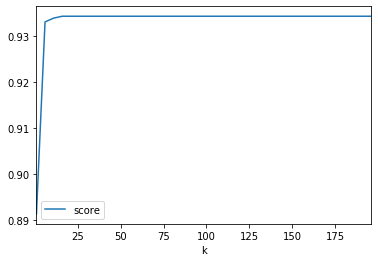

In [103]:
# This is a plot of test accuracy as a function of k

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score')

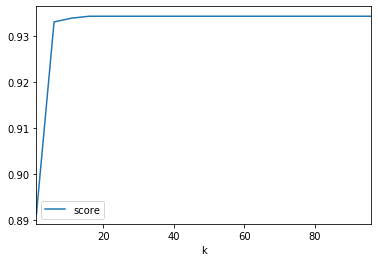

In [104]:
# Run between k range 10 and 100
scores = []
for k in range(1, 100, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

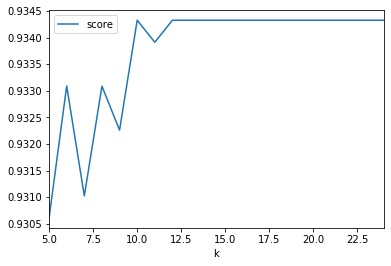

In [105]:
# K between 10 and 40
scores = []
for k in range(5, 25, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [106]:
#  Now maybe 13 neighbor
knn1 = KNeighborsClassifier(n_neighbors=13)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.9306930693069307